# TIME SERIES ANALYSIS AND SENTIMENT FORECASTING


## Importing The Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.tools import diff

## Reading the first 5 raws of our dataset


In [2]:
df_final=pd.read_csv("C:/Users/Admin/Downloads/abc.csv")
df_final.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month,final_review,polarity,blobsentiment
0,2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2018,1,handcream beautiful fragrance not stay protect...,0.483333,Positive
1,2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2016,8,no evidence product improvement similarly pric...,-0.083333,Negative
2,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Ajaey,True,2017,4,wonderful hand lotion seriously dry skin stay ...,0.346250,Positive
3,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,3,good hand cream silky thick soak way leave han...,0.306667,Positive
4,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,2,great hand lotion soak right leave skin super ...,0.519841,Positive


## Checking the columns in our dataset

In [3]:
df_final.columns

Index(['reviewTime', 'reviewerID', 'product_id', 'reviewText', 'summary',
       'rating', 'main_cat', 'title', 'rank_no', 'price', 'reviewerName',
       'verified', 'year', 'month', 'final_review', 'polarity',
       'blobsentiment'],
      dtype='object')

## Checking the shape of our dataset

In [4]:
print("The shapoe of our dataset is :",df_final.shape)

The shapoe of our dataset is : (21272, 17)


## Checking the datatype of of the columns of our dataset

In [5]:
df_final.dtypes

reviewTime        object
reviewerID        object
product_id        object
reviewText        object
summary           object
rating           float64
main_cat          object
title             object
rank_no          float64
price            float64
reviewerName      object
verified            bool
year               int64
month              int64
final_review      object
polarity         float64
blobsentiment     object
dtype: object

## Changing the datatype of reviewTime from object to datetime

In [6]:
df_final['reviewTime']=pd.to_datetime(df_final['reviewTime'])

In [7]:
(df_final['reviewTime']).dtypes

dtype('<M8[ns]')

## Setting and sorting our reviewTime as index of our dataset

In [8]:
df_final.set_index('reviewTime',inplace=True)

In [9]:
df_final.sort_index(inplace=True)

## Splitting our dataset  into positive_sentimental data , negative_sentimental data, and neeutral_sentimental data

In [10]:
df_positive=df_final[df_final['blobsentiment']=='Positive']
df_negative=df_final[df_final['blobsentiment']=='Negative']
df_neutral=df_final[df_final['blobsentiment']=='Neutral']

## Plotting the graph for the resampled price data as per monthlywise

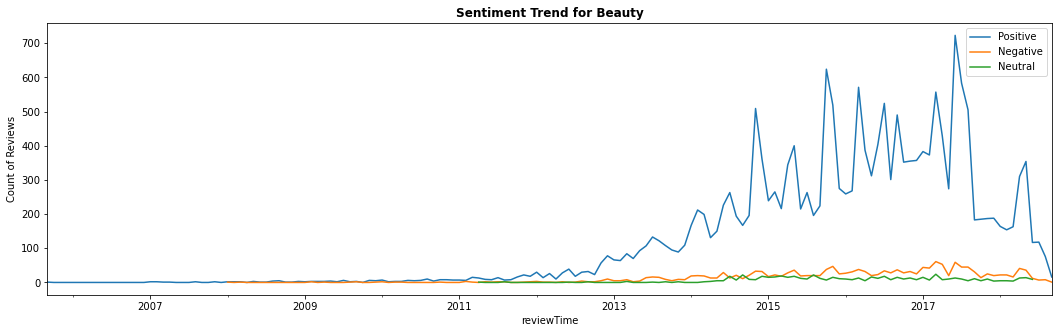

In [11]:
df_positive['price'].resample('M').count().plot(figsize=(18,5),label='Positive')
df_negative['price'].resample('M').count().plot(figsize=(18,5),label='Negative')
df_neutral['price'].resample('M').count().plot(figsize=(18,5),label='Neutral')
plt.legend()
plt.title('Sentiment Trend for Beauty',fontweight='bold')
plt.ylabel('Count of Reviews');

## Resampling our datasets as per the the monthly basis for price

In [12]:
df_positive_re=df_positive['price'].resample('M').sum()
df_negative_re=df_negative['price'].resample('M').sum()
df_neutral_re=df_neutral['price'].resample('M').sum()

## After resempling checking the null values from datasets

In [13]:
print("Null values in positive sentimental data")
print(df_positive_re[df_positive_re==0])
print("---------------------------")
print("Null values in negative sentimental data")
print(df_negative_re[df_negative_re==0])
print("---------------------------")
print("Null values in neutral sentimental data")
print(df_neutral_re[df_neutral_re==0])

Null values in positive sentimental data
reviewTime
2005-10-31    0.0
2005-11-30    0.0
2005-12-31    0.0
2006-01-31    0.0
2006-02-28    0.0
2006-03-31    0.0
2006-04-30    0.0
2006-05-31    0.0
2006-06-30    0.0
2006-07-31    0.0
2006-08-31    0.0
2006-09-30    0.0
2006-10-31    0.0
2006-11-30    0.0
2006-12-31    0.0
2007-05-31    0.0
2007-06-30    0.0
2007-07-31    0.0
2007-09-30    0.0
2007-10-31    0.0
2007-12-31    0.0
2008-04-30    0.0
2009-10-31    0.0
Name: price, dtype: float64
---------------------------
Null values in negative sentimental data
reviewTime
2008-02-29    0.0
2008-04-30    0.0
2008-05-31    0.0
2008-06-30    0.0
2008-07-31    0.0
2008-08-31    0.0
2008-09-30    0.0
2008-10-31    0.0
2008-11-30    0.0
2008-12-31    0.0
2009-01-31    0.0
2009-03-31    0.0
2009-05-31    0.0
2009-06-30    0.0
2009-07-31    0.0
2009-10-31    0.0
2009-11-30    0.0
2010-02-28    0.0
2010-05-31    0.0
2010-06-30    0.0
2010-07-31    0.0
2010-08-31    0.0
2010-09-30    0.0
2010-11-30  

## For making our data continuous for the forecasting we are selecting the data accordingly

In [14]:
df_positive_re = df_positive_re[df_positive_re.index>'2008-12-31']
df_negative_re = df_negative_re[df_negative_re.index>'2010-12-31']
df_neutral_re = df_neutral_re[df_neutral_re.index>'2013-12-31']

## Using the decomposition for checking the trend,seasonality and residuals in our data

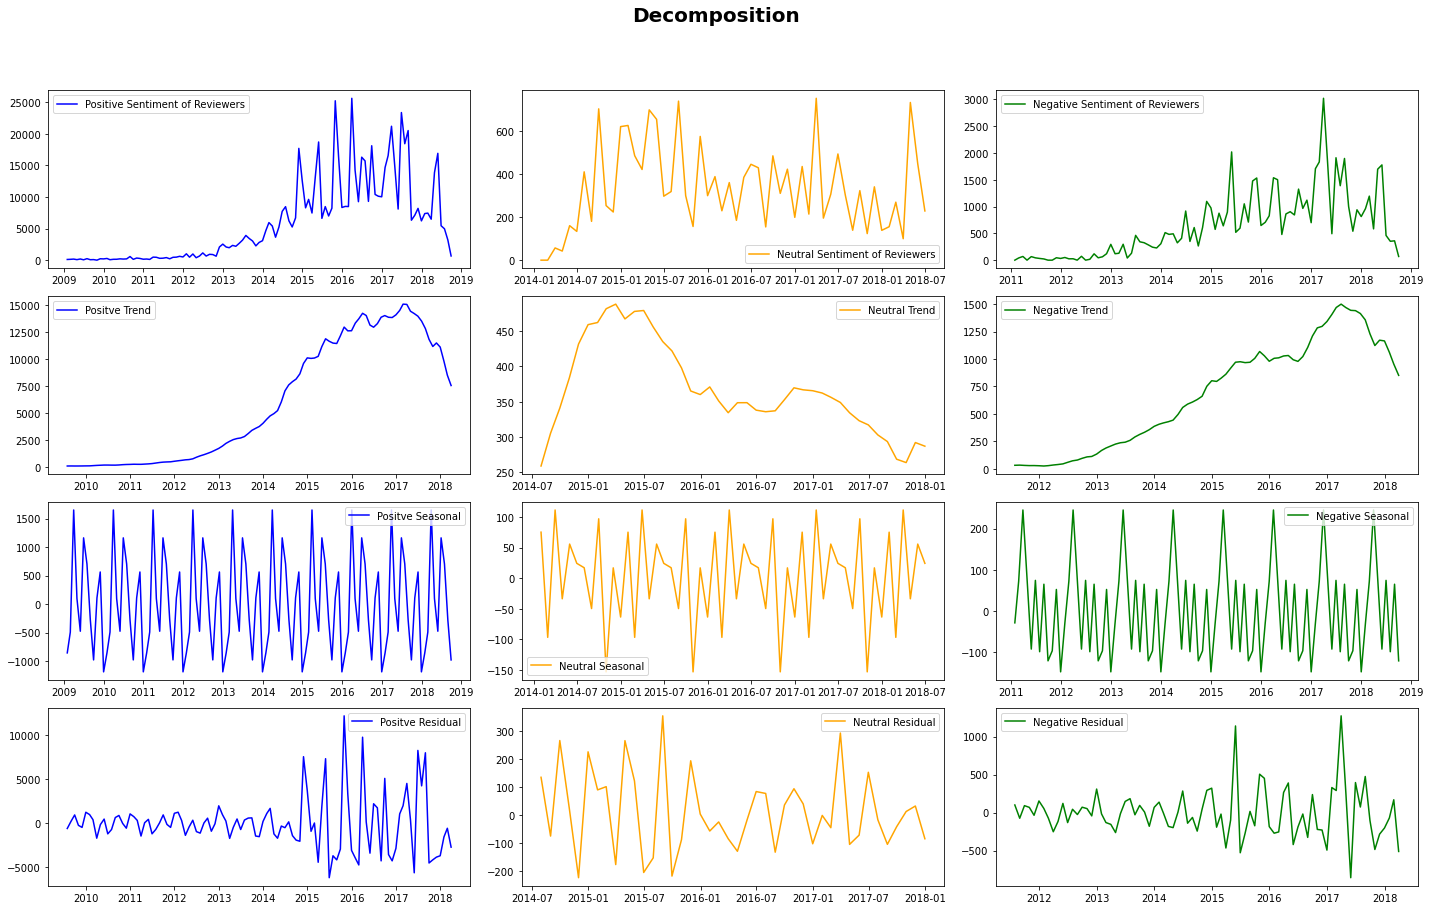

In [15]:
# Decomposition plot for predicted data using Features
decomposition_p=seasonal_decompose(df_positive_re, period=12)
d_trend_p=decomposition_p.trend
d_seasonal_p=decomposition_p.seasonal
d_residual_p=decomposition_p.resid
decomposition=seasonal_decompose(df_neutral_re, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
decomposition_n=seasonal_decompose(df_negative_re, period=12)
d_trend_n=decomposition_n.trend
d_seasonal_n=decomposition_n.seasonal
d_residual_n=decomposition_n.resid
# plotting all the 4 graphs
fig,ax = plt.subplots(4,3,figsize=(20,12))
plt.subplot(4,3,1)
plt.plot(df_positive_re,label='Positive Sentiment of Reviewers',color='b')
plt.legend(loc='best')
plt.subplot(4,3,2)
plt.plot(df_neutral_re,label='Neutral Sentiment of Reviewers',color='orange')
plt.legend(loc='best')
plt.subplot(4,3,3)
plt.plot(df_negative_re,label='Negative Sentiment of Reviewers',color='g')
plt.legend(loc='best')
plt.subplot(4,3,4)
plt.plot(d_trend_p,label='Positve Trend',color='b')
plt.legend(loc='best')
plt.subplot(4,3,5)
plt.plot(d_trend,label='Neutral Trend',color='orange')
plt.legend(loc='best')
plt.subplot(4,3,6)
plt.plot(d_trend_n,label='Negative Trend',color='g')
plt.legend(loc='best')
plt.subplot(4,3,7)
plt.plot(d_seasonal_p,label='Positve Seasonal',color='b')
plt.legend(loc='best')
plt.subplot(4,3,8)
plt.plot(d_seasonal,label='Neutral Seasonal',color='orange')
plt.legend(loc='best')
plt.subplot(4,3,9)
plt.plot(d_seasonal_n,label='Negative Seasonal',color='g')
plt.legend(loc='best')
plt.subplot(4,3,10)
plt.plot(d_residual_p,label='Positve Residual',color='b')
plt.legend(loc='best')
plt.subplot(4,3,11)
plt.plot(d_residual,label='Neutral Residual',color='orange')
plt.legend(loc='best')
plt.subplot(4,3,12)
plt.plot(d_residual_n,label='Negative Residual',color='g')
plt.legend(loc='best')
plt.suptitle('Decomposition',x=0.5,y=1.05,fontweight='bold',fontsize=20)
plt.tight_layout()

## Checking the stationarity of our datasets

In [16]:
# dickey-fuller test for stationarity
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    dfoutput = pd.Series(result[0:4],index=['tstat','pvalue','lags','obs'])
    pvalue = dfoutput['pvalue']
    ''' 
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)    
    return(msg)

In [17]:
print("Checking the Stationarity for our positive sentimental dataset:")
print(checkStationarity(df_positive_re))

Checking the Stationarity for our positive sentimental dataset:
p-value=0.6018471245066841. Data is not stationary


In [18]:
print("Checking the Stationarity for our negative sentimental dataset:")
print(checkStationarity(df_negative_re))

Checking the Stationarity for our negative sentimental dataset:
p-value=0.5588070912011877. Data is not stationary


In [19]:
print("Checking the Stationarity for our neutral sentimental dataset:")
print(checkStationarity(df_neutral_re))

Checking the Stationarity for our neutral sentimental dataset:
p-value=0.04948028750095208. Data is stationary


## Storing the data into dataframes for positive,negative and neutral

In [20]:
df_pos=pd.DataFrame(df_positive_re)

In [21]:
df_neg=pd.DataFrame(df_negative_re)

In [22]:
df_neu=pd.DataFrame(df_neutral_re)

## Making our datasets stationary by using lag difference technique

In [23]:
# difference the data by 2
df_pos['diff_1'] = diff(df_pos['price'],k_diff=2) #d = 2

In [24]:
print("Checking the Stationarity for our positive sentimental dataset:")
checkStationarity(df_pos['diff_1'].dropna())

Checking the Stationarity for our positive sentimental dataset:


'p-value=5.0499844076261193e-11. Data is stationary'

In [25]:
# difference the data by 1
df_neg['diff_1'] = diff(df_neg['price'],k_diff=1) #d = 1

In [26]:
print("Checking the Stationarity for our negative sentimental dataset:")
checkStationarity(df_neg['diff_1'].dropna())

Checking the Stationarity for our negative sentimental dataset:


'p-value=6.455731205918992e-17. Data is stationary'

In [27]:
print("Checking the Stationarity for our neutral sentimental dataset:")
checkStationarity(df_neu)  # As our data is already stationary so d=0

Checking the Stationarity for our neutral sentimental dataset:


'p-value=0.04948028750095208. Data is stationary'